<a href="https://colab.research.google.com/github/aimanhaziqmy/Data-analytics-sleep-health-and-lifestyle/blob/main/Sleep_quality_and_lifestyle_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sleep health and lifestyle analysis

Sleep Health and Lifestyle
This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, data.csv, with the following columns:

- Person ID
- Gender
- Age
-  Occupation
- Sleep Duration: Average number of hours of sleep per day
- Quality of Sleep: A subjective rating on a 1-10 scale
- Physical Activity Level: Average number of minutes the person engages in physical activity daily
- Stress Level: A subjective rating on a 1-10 scale
- BMI Category
- Blood Pressure: Indicated as systolic pressure over diastolic pressure
- Heart Rate: In beats per minute
- Daily Steps
- Sleep Disorder: One of None, Insomnia or Sleep Apnea


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [3]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Analyse the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [6]:
data['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [7]:
data['Blood Pressure'].value_counts()

130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: Blood Pressure, dtype: int64

In [9]:
data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [10]:
data.shape

(374, 13)

In [12]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

1. What are the average sleep duration in the dataset

In [13]:
data.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


In [15]:
mean_sleep = data['Sleep Duration'].mean()
median_sleep = data['Sleep Duration'].median()
print("Mean Sleep Duration : ", mean_sleep)
print("Median Sleep Duration : ", median_sleep)

Mean Sleep Duration :  7.132085561497325
Median Sleep Duration :  7.2


2. How does sleep quality vary with age and gender ?

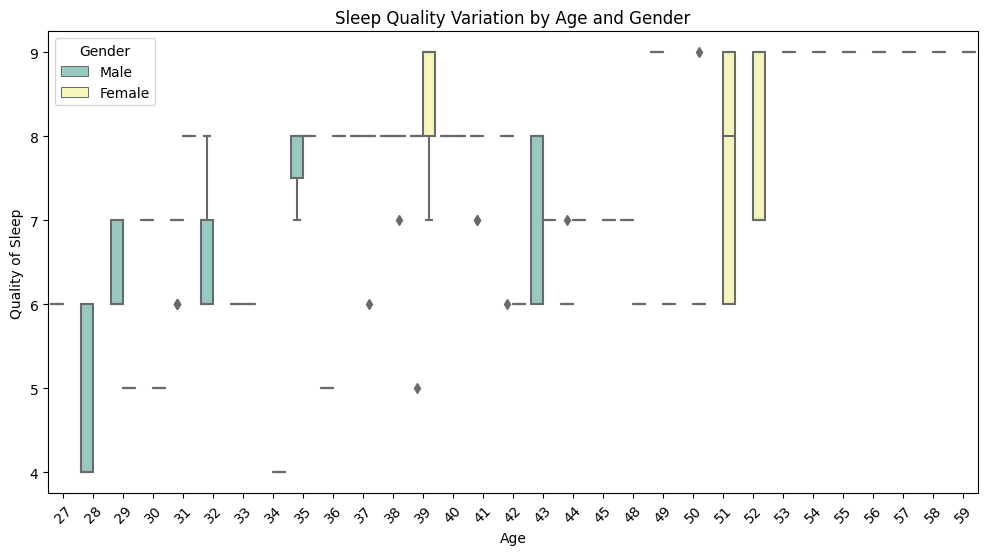

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Age", y="Quality of Sleep", hue="Gender", data=data, palette="Set3")
plt.title("Sleep Quality Variation by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Quality of Sleep")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

3. Is there a correlation between stress level and sleep duration ?

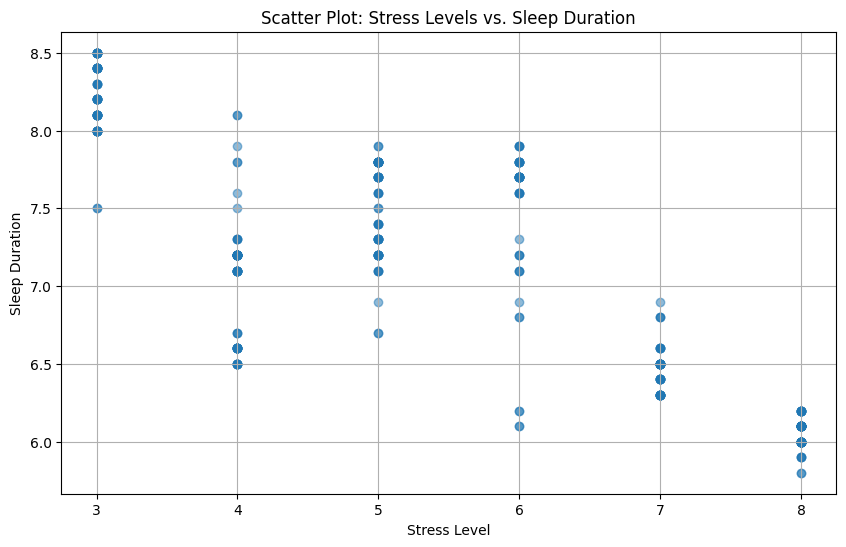

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(data['Stress Level'], data['Sleep Duration'], alpha=0.5)
plt.title("Scatter Plot: Stress Levels vs. Sleep Duration")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration")
plt.grid(True)
plt.show()

4. What is the distribution of BMI categories in the dataset ?

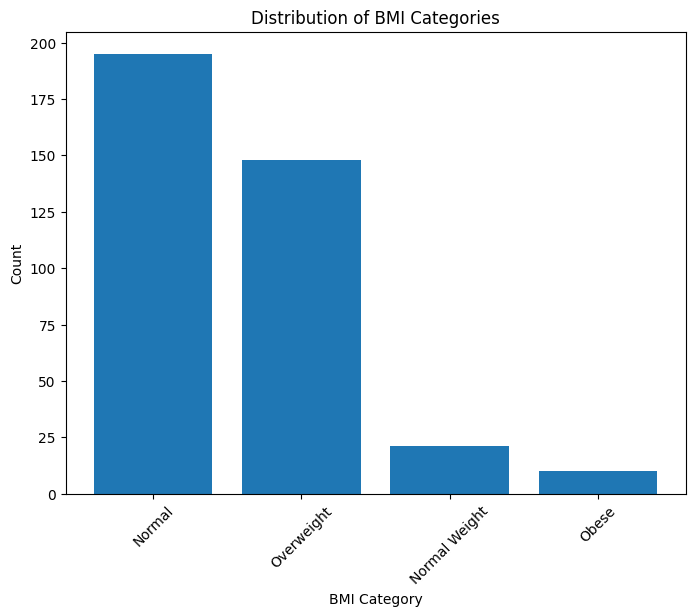

In [18]:
bmi_counts = data['BMI Category'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(bmi_counts.index, bmi_counts.values)
plt.title("Distribution of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

5. Are there any trends in heart rate based on physical activity level ?


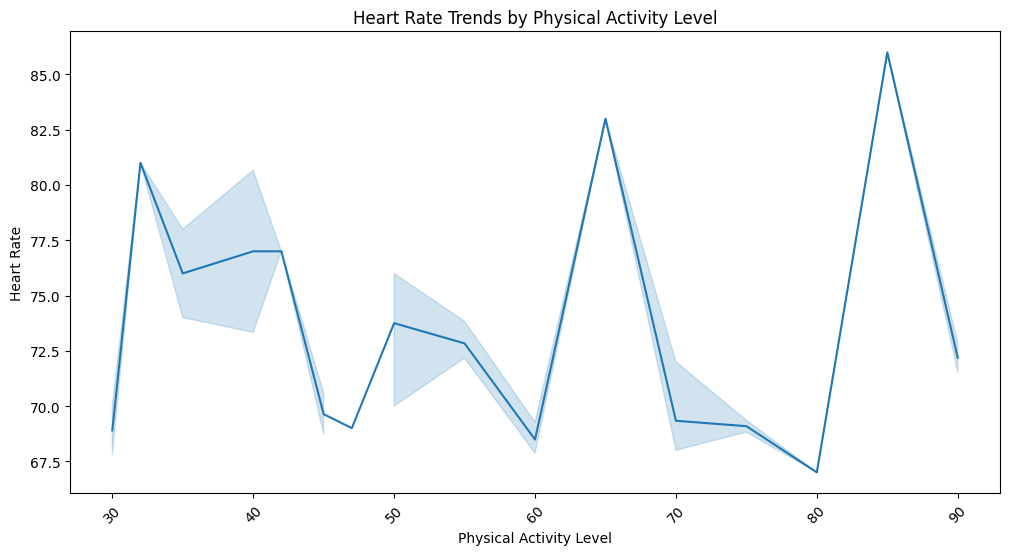

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Physical Activity Level", y="Heart Rate", data=data)
plt.title("Heart Rate Trends by Physical Activity Level")
plt.xlabel("Physical Activity Level")
plt.ylabel("Heart Rate")
plt.xticks(rotation=45)
plt.show()

6. Do people with sleep disorders have lower sleep quality on average ?

In [24]:
with_sleep_disorder = data[data['Sleep Disorder'] == 'Yes']['Quality of Sleep']
without_sleep_disorder = data[data['Sleep Disorder'] == 'No']['Quality of Sleep']

t_statistic, p_value = stats.ttest_ind(with_sleep_disorder, without_sleep_disorder)
print("T-Statistics : ", t_statistic)
print("P-Value : ", p_value)

alpha = 0.05
if p_value < alpha :
  print("There is a significant difference in sleep quality between groups")
else :
  print("There is no significant difference in sleep quality between groups")

T-Statistics :  nan
P-Value :  nan
There is no significant difference in sleep quality between groups


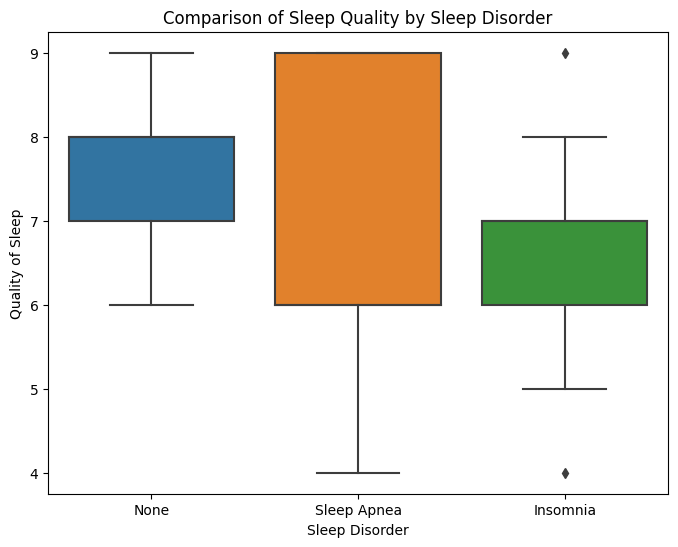

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=data)
plt.title("Comparison of Sleep Quality by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Quality of Sleep")
plt.show()

7. How does occupation affect daily steps taken ?

In [26]:
data.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


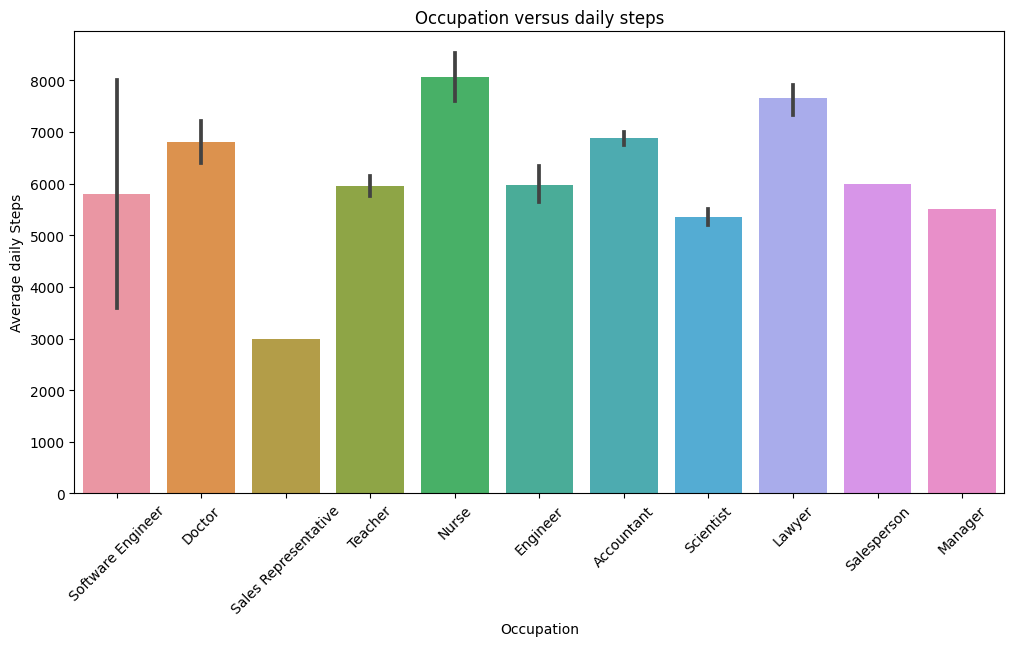

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x="Occupation", y="Daily Steps", data=data)
plt.title("Occupation versus daily steps")
plt.xlabel("Occupation")
plt.ylabel("Average daily Steps")
plt.xticks(rotation=45)
plt.show()

8. Are there any patterns in blood pressure accross different age groups?

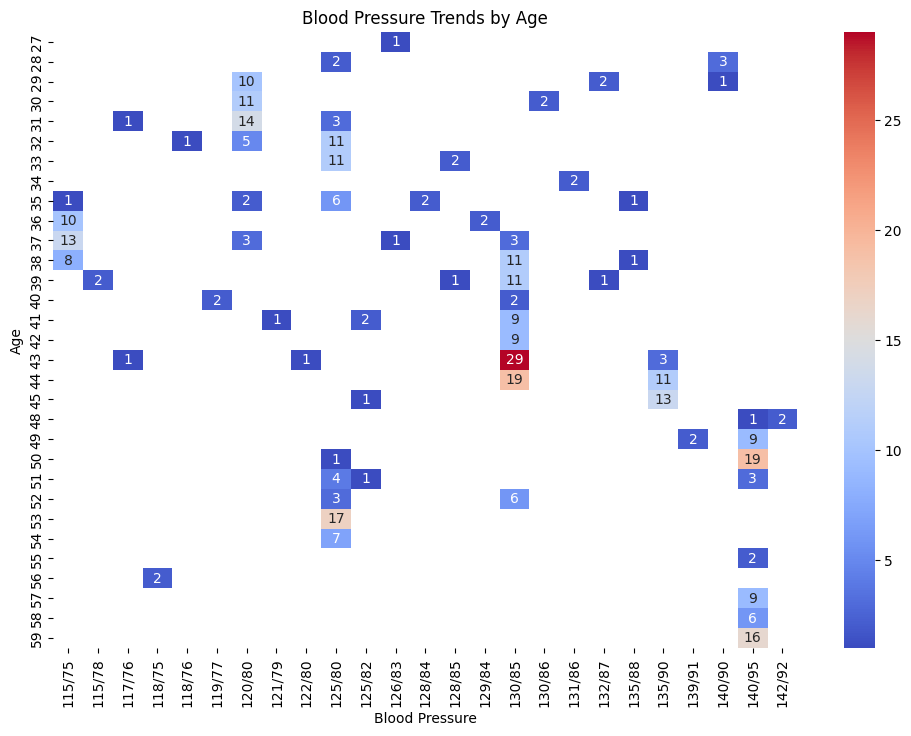

In [29]:
heatmap_data = data.pivot_table(index='Age', columns='Blood Pressure', values='Person ID', aggfunc='count')
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g', cbar=True)
plt.title('Blood Pressure Trends by Age')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

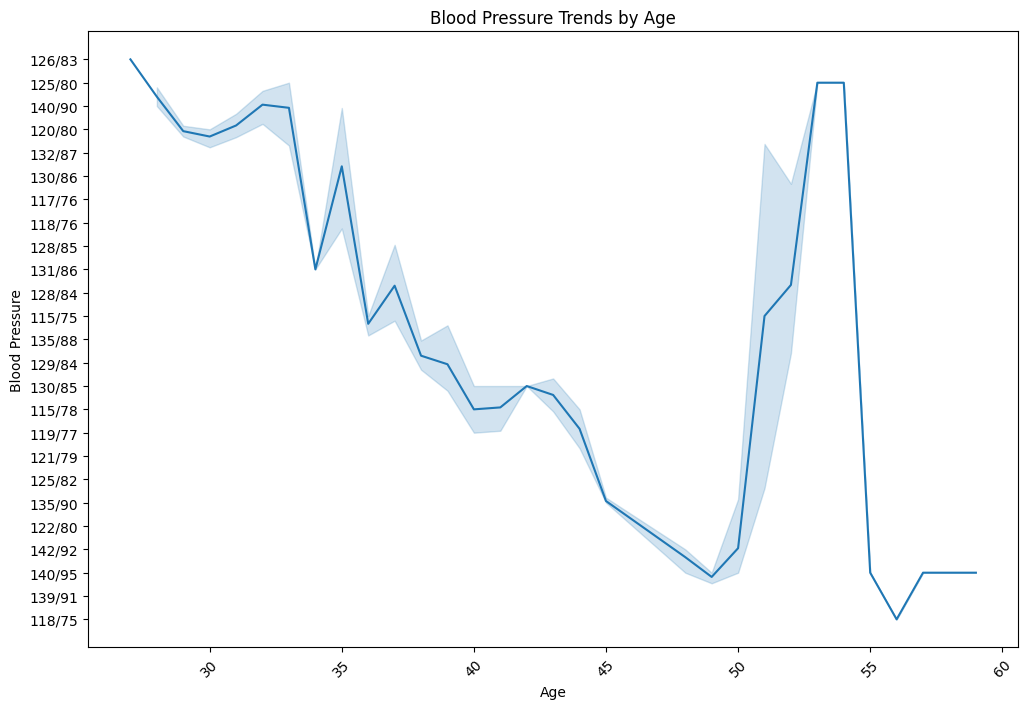

In [30]:
# line plot to visualise blood pressure trends by age
plt.figure(figsize=(12,8))
sns.lineplot(x="Age", y="Blood Pressure", data=data)
plt.title("Blood Pressure Trends by Age")
plt.ylabel("Blood Pressure")
plt.xticks(rotation=45)
plt.show()

9. Is there a correlation between stress level and sleep duration ?

In [32]:
correlation_coefficient = np.corrcoef(data['Stress Level'], data['Sleep Duration'])[0,1]
print('Pearson Correlation Coefficient :', correlation_coefficient)

if correlation_coefficient > 0 :
  print("There is a positive correlation between stress levels and sleep duration")
elif correlation_coefficient < 0 :
  print("There is a negative correlation between stress levels and sleep duration")
else :
  print("There is no significant correlation between stress levels and sleep duration")

Pearson Correlation Coefficient : -0.8110230278940451
There is a negative correlation between stress levels and sleep duration


10. Correlation between all numeric variables in the dataset

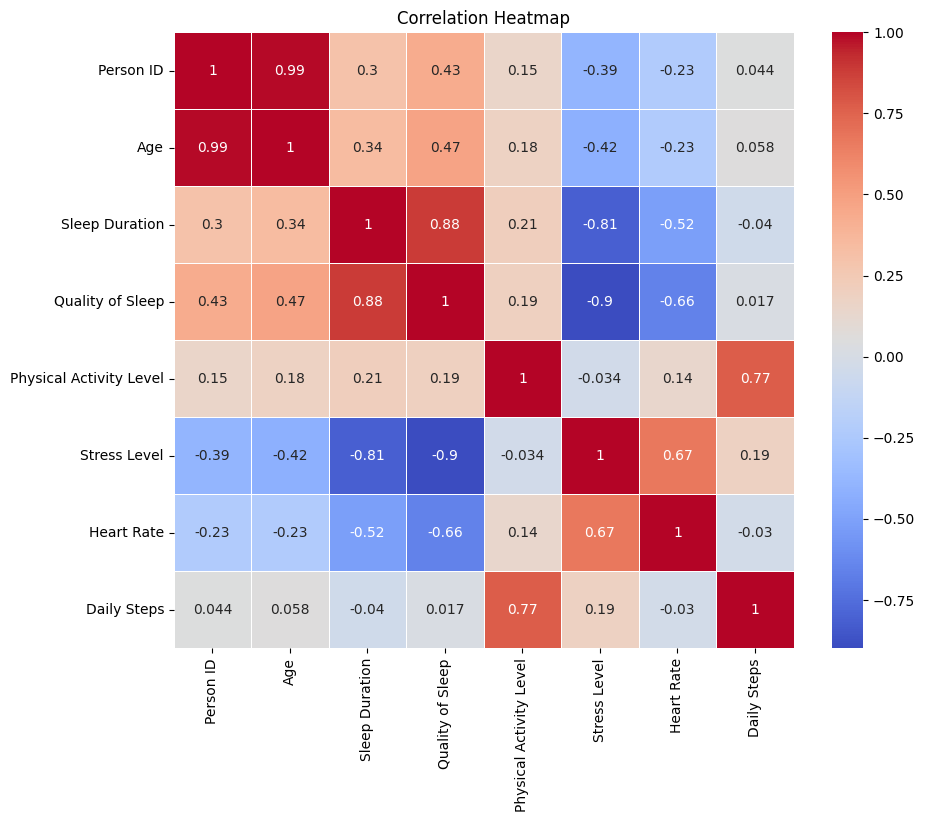

In [34]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()